# Importing the neccessary libraries

In [2]:
#! D:\SummerIntern files\myenv\Scripts\python.exe
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

# Importing the Dataset

In [3]:
data=pd.read_csv(r"D:\SummerIntern files\trafficVolumeData.csv")

# Analysing the Data

In [4]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [18]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


# Checking the null values

In [20]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

# Handling the missing values

In [21]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1980\3727727439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(),inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1980\3727727439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [22]:
from collections import Counter

In [23]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [24]:
data['weather'].fillna('Clouds',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1980\1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [25]:
data.isnull().sum()

holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
dtype: int64

# Encoding the data

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
data['weather'] = le.fit_transform(data['weather'])

In [10]:
data['holiday'] = le.fit_transform(data['holiday'])

In [11]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Convert date-like columns to datetime, and then to numeric (timestamps)
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column contains strings
        try:
            # Try to convert to datetime
            data[column] = pd.to_datetime(data[column], errors='coerce')
        except Exception as e:
            print(f"Error converting column {column} to datetime: {e}")

# Now convert datetime columns to numeric (timestamps)
for column in data.columns:
    if data[column].dtype == 'datetime64[ns]':  # Identify datetime columns
        data[column] = data[column].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

# Optionally, handle invalid date entries by filling NaT with a default date (if needed)
# data['your_date_column'] = data['your_date_column'].fillna(pd.to_datetime('1970-01-01'))

# Filter to select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Output the correlation matrix
print(correlation_matrix)


C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\2765950530.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\2765950530.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\2765950530.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column], errors='coerce')


                    temp      rain      snow      date      Time  \
temp            1.000000  0.009070 -0.019759  0.090827  0.111868   
rain            0.009070  1.000000 -0.000090  0.002916  0.003421   
snow           -0.019759 -0.000090  1.000000  0.009302  0.009851   
date            0.090827  0.002916  0.009302  1.000000 -0.008168   
Time            0.111868  0.003421  0.009851 -0.008168  1.000000   
traffic_volume  0.130110  0.004714  0.000736 -0.004889  0.352401   

                traffic_volume  
temp                  0.130110  
rain                  0.004714  
snow                  0.000736  
date                 -0.004889  
Time                  0.352401  
traffic_volume        1.000000  


In [7]:
data.corr()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,1.000000,0.009070,-0.019759,NaN,0.090827,0.111868,0.130110
rain,NaN,0.009070,1.000000,-0.000090,NaN,0.002916,0.003421,0.004714
snow,NaN,-0.019759,-0.000090,1.000000,NaN,0.009302,0.009851,0.000736
weather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,NaN,0.090827,0.002916,0.009302,NaN,1.000000,-0.008168,-0.004889
Time,NaN,0.111868,0.003421,0.009851,NaN,-0.008168,1.000000,0.352401
traffic_volume,NaN,0.130110,0.004714,0.000736,NaN,-0.004889,0.352401,1.000000


In [33]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,11,288.28,0.0,0.0,1,1.328832e+09,1.750756e+09,5545
1,11,289.36,0.0,0.0,1,1.328832e+09,1.750759e+09,4516
2,11,289.58,0.0,0.0,1,1.328832e+09,1.750763e+09,4767
3,11,290.13,0.0,0.0,1,1.328832e+09,1.750766e+09,5026
4,11,291.14,0.0,0.0,1,1.328832e+09,1.750770e+09,4918


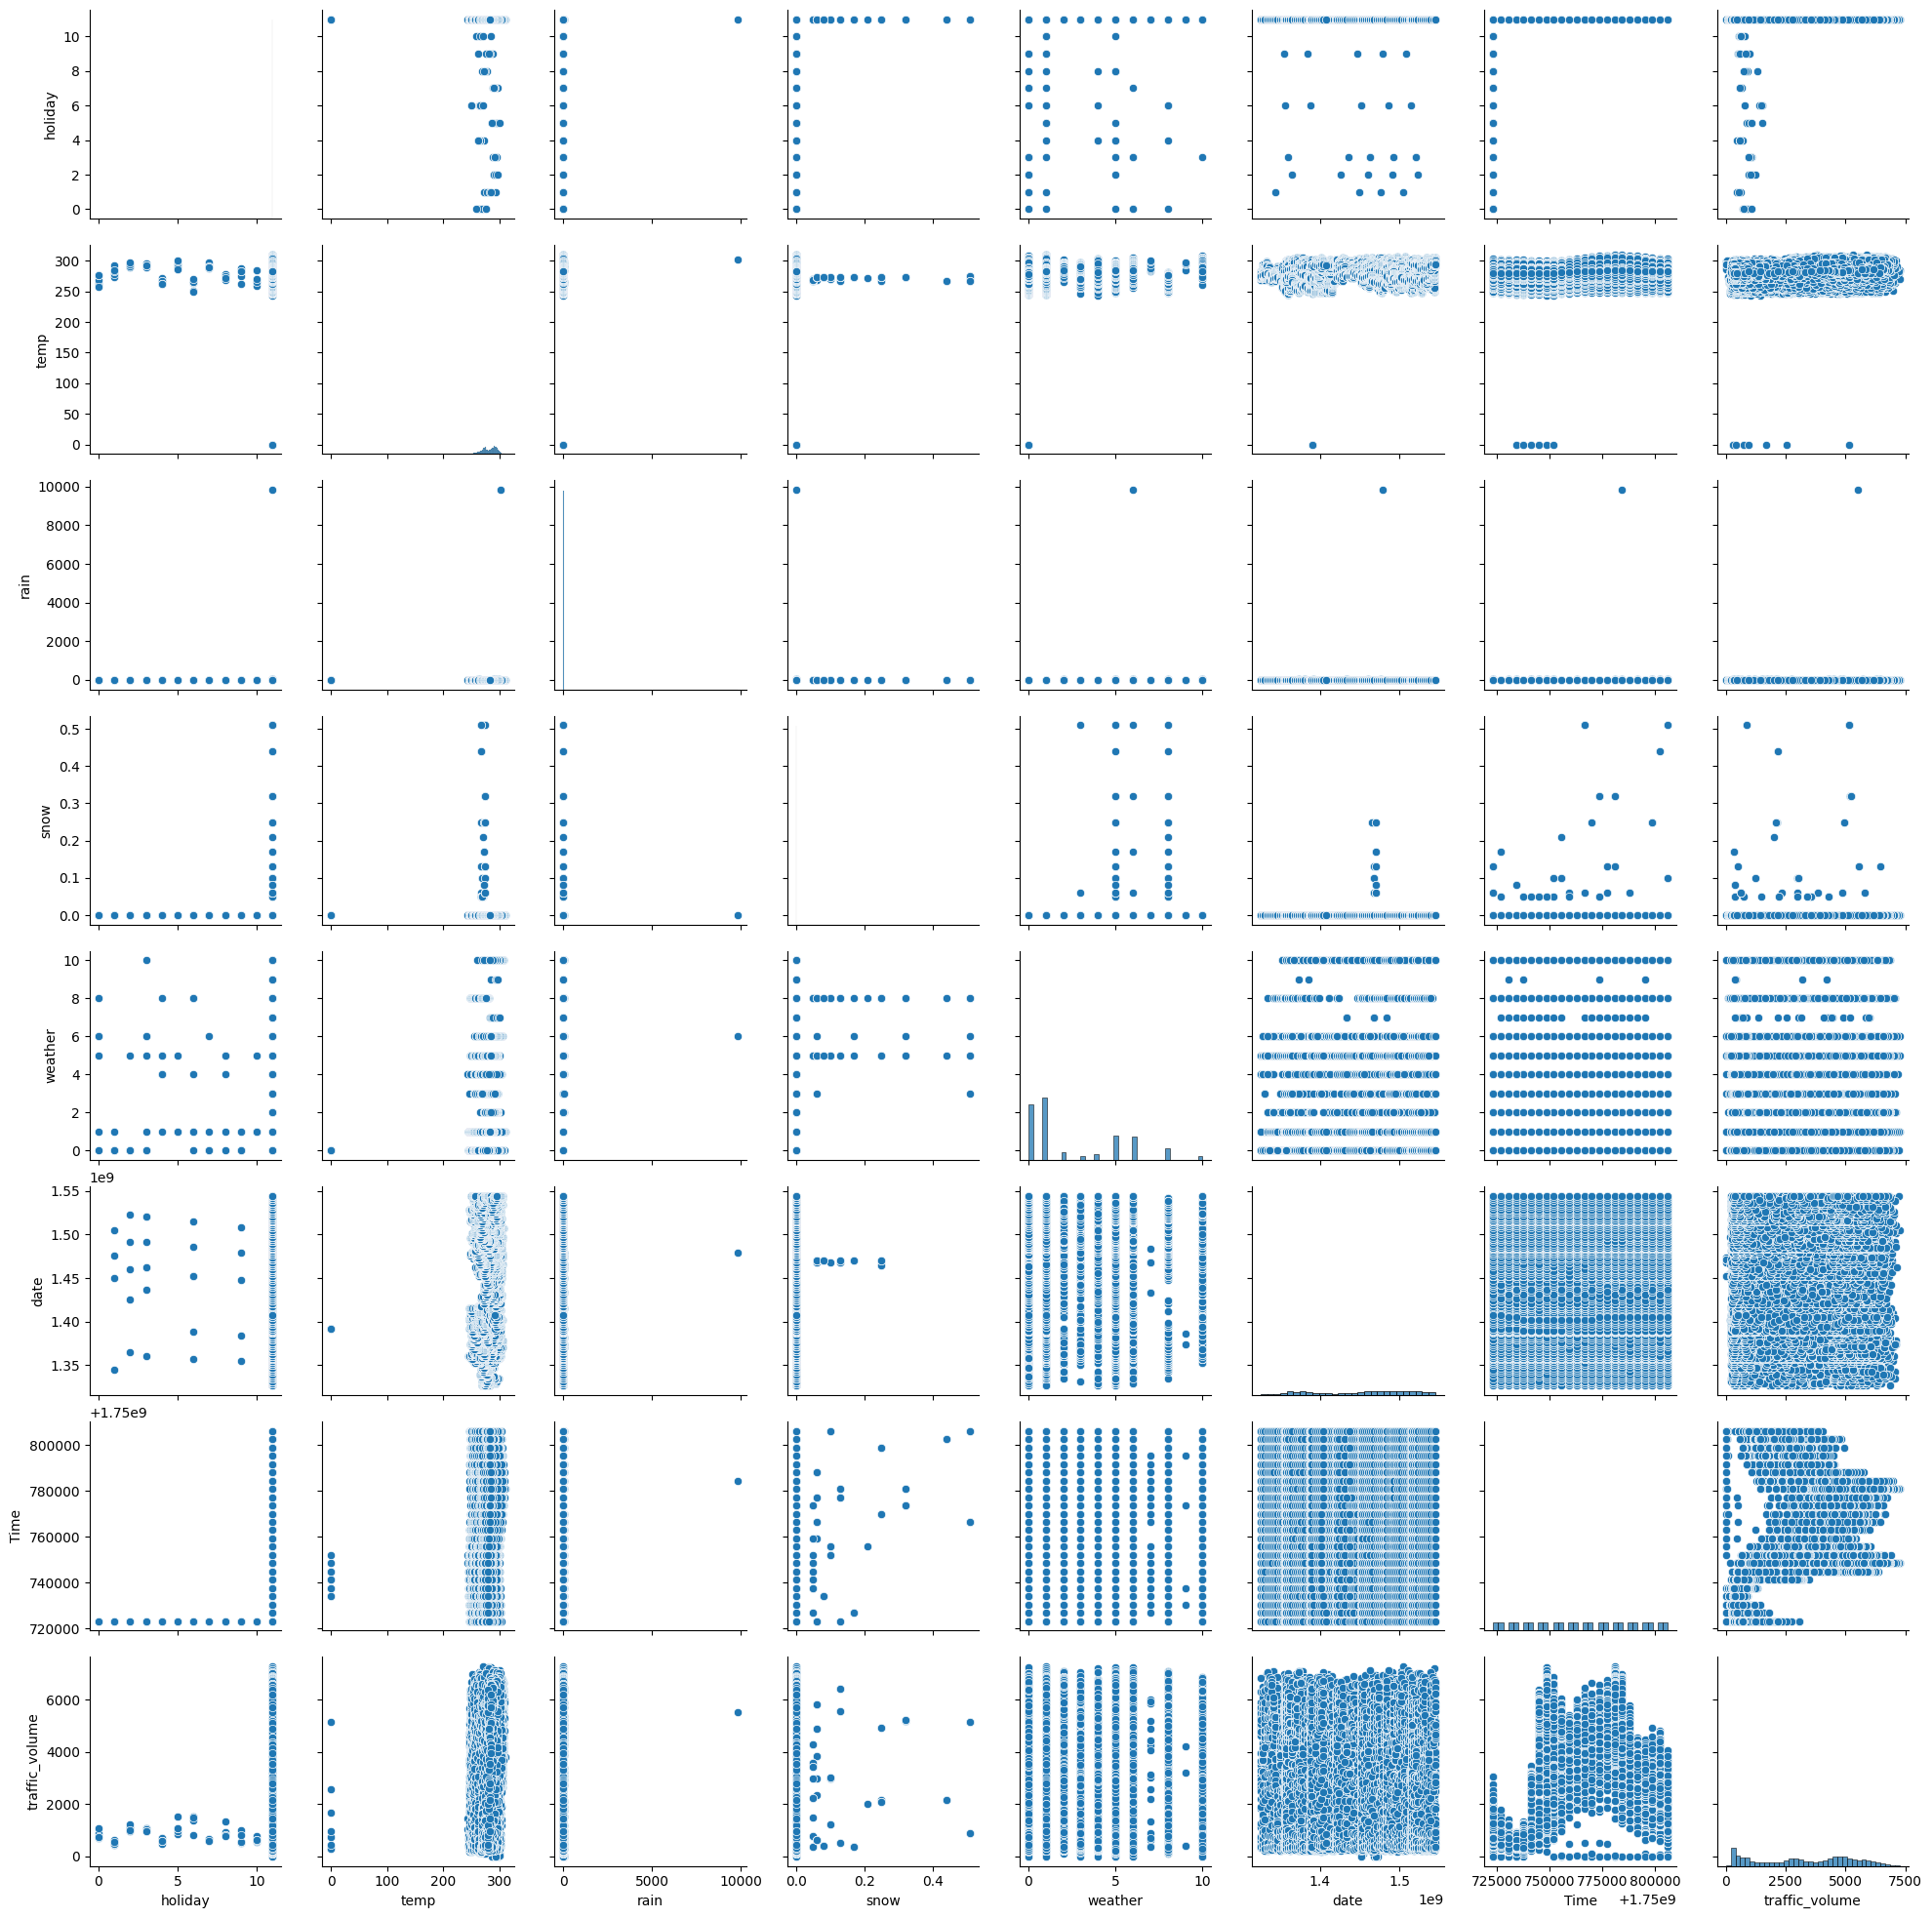

In [34]:
sns.pairplot(data)

<Axes: >

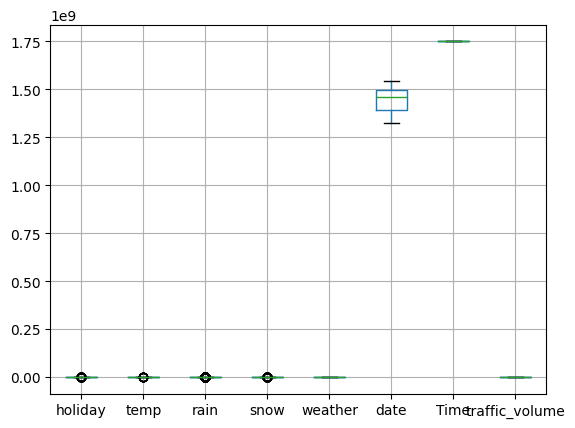

In [35]:
data.boxplot()

In [36]:
data.corr()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
holiday,1.000000,0.004646,0.000177,0.000863,-0.001851,-0.000981,0.052041,0.038057
temp,0.004646,1.000000,0.009070,-0.019758,-0.033559,0.090534,0.111811,0.130034
rain,0.000177,0.009070,1.000000,-0.000090,0.009542,0.002916,0.003421,0.004714
snow,0.000863,-0.019758,-0.000090,1.000000,0.036662,0.009280,0.009850,0.000735
weather,-0.001851,-0.033559,0.009542,0.036662,1.000000,0.023540,-0.053575,-0.040035
date,-0.000981,0.090534,0.002916,0.009280,0.023540,1.000000,-0.008168,-0.004889
Time,0.052041,0.111811,0.003421,0.009850,-0.053575,-0.008168,1.000000,0.352401
traffic_volume,0.038057,0.130034,0.004714,0.000735,-0.040035,-0.004889,0.352401,1.000000


# Splitting Date and Time

In [41]:
#data[["day","month","year"]] = data["date"].str.split("-", expand = True)
import pandas as pd

# Ensure that the 'date' column is treated as a string (for cases like NaNs or non-numeric entries)
data["date"] = data["date"].astype(str)

# Step 1: Convert Unix timestamps (float64) to datetime if they exist
# We will convert the float (Unix timestamp) to datetime if it's in seconds.
# For Unix timestamp in seconds, use 'unit='s'' to convert.

def convert_to_datetime(value):
    try:
        # Check if it's a valid float representing a Unix timestamp
        timestamp = float(value)
        # Convert Unix timestamp to datetime
        return pd.to_datetime(timestamp, unit='s')
    except ValueError:
        # If conversion fails, return NaT (Not a Time) or handle as needed
        return pd.NaT

# Apply conversion to each value in the 'date' column
data["date"] = data["date"].apply(convert_to_datetime)

# Step 2: Handle missing dates (if any) after conversion
# You can either drop rows or fill with a default date
# Option 1: Drop rows with missing dates
# data = data.dropna(subset=["date"])

# Option 2: Fill missing dates with a default date (e.g., "1900-01-01")
data["date"] = data["date"].fillna("1900-01-01")

# Step 3: Split 'date' into 'year', 'month', and 'day'
# Convert the date to string format for splitting
data["date"] = data["date"].astype(str)
data[["year", "month", "day"]] = data["date"].str.split("-", expand=True)

# Display the updated DataFrame
print(data)


       holiday    temp  rain  snow  weather        date          Time  \
0           11  288.28   0.0   0.0        1  2012-02-10  1.750756e+09   
1           11  289.36   0.0   0.0        1  2012-02-10  1.750759e+09   
2           11  289.58   0.0   0.0        1  2012-02-10  1.750763e+09   
3           11  290.13   0.0   0.0        1  2012-02-10  1.750766e+09   
4           11  291.14   0.0   0.0        1  2012-02-10  1.750770e+09   
...        ...     ...   ...   ...      ...         ...           ...   
48199       11  283.45   0.0   0.0        1  1900-01-01  1.750792e+09   
48200       11  282.76   0.0   0.0        1  1900-01-01  1.750795e+09   
48201       11  282.73   0.0   0.0       10  1900-01-01  1.750799e+09   
48202       11  282.09   0.0   0.0        1  1900-01-01  1.750802e+09   
48203       11  282.12   0.0   0.0        1  1900-01-01  1.750806e+09   

       traffic_volume  year month day  
0                5545  2012    02  10  
1                4516  2012    02  10  
2  

In [48]:
#data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)
import pandas as pd

# Assuming 'data' is your DataFrame and it has a column 'Time'

# Step 1: Convert 'Time' column to string if it's not already (to avoid any type issues)
data["Time"] = data["Time"].astype(str)

# Step 2: Handle missing or malformed time values
# Optionally, fill NaN values with a default time (e.g., "00:00:00")
data["Time"] = data["Time"].fillna("00:00:00")

# Step 3: Ensure every time value has seconds (i.e., make sure format is HH:MM:SS)
# If the time is in HH:MM format, append ":00" for seconds
data["Time"] = data["Time"].apply(lambda x: x + ":00" if len(x.split(":")) == 2 else x)

# Step 4: Now split the 'Time' column into 'hours', 'minutes', and 'seconds'
split_time = data["Time"].str.split(":", expand=True)

# Step 5: Check how many columns `split_time` has
print(f"Columns in split_time: {split_time.shape[1]}")

# Step 6: Handle any potential issues with the number of columns
# If the split resulted in more or fewer than 3 columns, fill missing columns with '0'
if split_time.shape[1] == 2:  # If split resulted in HH:MM format
    split_time[["hours", "minutes"]] = split_time
    split_time["seconds"] = "00"  # Fill missing seconds
elif split_time.shape[1] == 1:  # If split resulted in a single column
    split_time[["hours"]] = split_time
    split_time["minutes"] = "00"
    split_time["seconds"] = "00"

# Step 7: Now assign the columns back to the original data
data[["hours", "minutes", "seconds"]] = split_time[["hours", "minutes", "seconds"]]

# Step 8: Display the updated DataFrame
print(data)



Columns in split_time: 1
       holiday    temp  rain  snow  weather        date          Time  \
0           11  288.28   0.0   0.0        1  2012-02-10  1750755600.0   
1           11  289.36   0.0   0.0        1  2012-02-10  1750759200.0   
2           11  289.58   0.0   0.0        1  2012-02-10  1750762800.0   
3           11  290.13   0.0   0.0        1  2012-02-10  1750766400.0   
4           11  291.14   0.0   0.0        1  2012-02-10  1750770000.0   
...        ...     ...   ...   ...      ...         ...           ...   
48199       11  283.45   0.0   0.0        1  1900-01-01  1750791600.0   
48200       11  282.76   0.0   0.0        1  1900-01-01  1750795200.0   
48201       11  282.73   0.0   0.0       10  1900-01-01  1750798800.0   
48202       11  282.09   0.0   0.0        1  1900-01-01  1750802400.0   
48203       11  282.12   0.0   0.0        1  1900-01-01  1750806000.0   

       traffic_volume  year month day         hours minutes seconds  
0                5545  2012 

In [13]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [14]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume
0,11,288.28,0.0,0.0,1,5545
1,11,289.36,0.0,0.0,1,4516
2,11,289.58,0.0,0.0,1,4767
3,11,290.13,0.0,0.0,1,5026
4,11,291.14,0.0,0.0,1,4918


# Splitting The Dataset Into Dependent And Independent Variable

In [15]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)

In [16]:
names = x.columns

# Feature scaling

In [53]:
from sklearn.preprocessing import scale

In [54]:
x = scale(x)

In [55]:
x = pd.DataFrame(x,columns=names)

In [56]:
x.head()

,holiday,temp,rain,snow,weather,year,month,day,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,1.181469,-0.342593,2.00067,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,1.181469,-0.342593,2.00067,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,1.181469,-0.342593,2.00067,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,1.181469,-0.342593,2.00067,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,1.181469,-0.342593,2.00067,0.230807,0.0,0.0


# Splitting The Data Into Train And Test

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

# Training And Testing The Model

# Initializing the model

In [59]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost


# Fitting the models with x_train and y_train

In [60]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

Fitting the models with x_train and y_train

In [61]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Predicting the y_train values and calculate the accuracy

In [62]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

# Regression Evaluation Metrics

In [63]:
from sklearn import metrics

#  R-squared _score 

In [64]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.527652486896673
0.9958642443870742
0.9635413155338098
-10.658753385203662
0.807792067527771


In [65]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [66]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.387863124274994
0.6634648192221526
0.7513420216732458
-10.679408610100289
0.7747458815574646


# RMSE –Root Mean Square Error

In [67]:
MSE = metrics.mean_squared_error(p3,y_test)

In [68]:
np.sqrt(MSE)

np.float64(905.1911872795189)

# Saving the Model

In [69]:
import pickle


In [70]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))